In [2]:
5 * 452

2260

In [2]:
2 * 32

64

In [3]:
pyspark

NameError: name 'pyspark' is not defined

In [4]:
# import necessary libraries
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession

In [3]:
# create sparksession
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [4]:
spark

In [5]:
#!wget https://data.vermont.gov/api/views/786x-sbp3/rows.csv?accessType=DOWNLOAD
#!ls -ltr
#!pwd
#!mv rows.csv\?accessType\=DOWNLOAD rows.csv
df = spark.read.csv('gs://dexdebra-123/datasets/vermont.csv', header='true', inferSchema = True)
df = df.withColumn("Amount", df["Amount"].cast("double"))

In [6]:
df

DataFrame[Quarter Ending: string, Department: string, UnitNo: int, Vendor Number: string, Vendor: string, City: string, State: string, DeptID Description: string, DeptID: string, Amount: double, Account: string, AcctNo: string, Fund Description: string, Fund: string]

In [7]:
#we can use the columns attribute just like with pandas
columns = df.columns
print('The column :')
for i in columns:
    print(i)

The column :
Quarter Ending
Department
UnitNo
Vendor Number
Vendor
City
State
DeptID Description
DeptID
Amount
Account
AcctNo
Fund Description
Fund


In [8]:
print('The total number of rows is:', df.count(), '\nThe total number of columns is:', len(df.columns))

The total number of rows is: 1594689 
The total number of columns is: 14


In [12]:
#show first 5 rows
df.show(5)

+--------------+--------------------+------+-------------+--------------------+---------+-----+--------------------+----------+-------+--------------------+------+--------------------+-----+
|Quarter Ending|          Department|UnitNo|Vendor Number|              Vendor|     City|State|  DeptID Description|    DeptID| Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+-------------+--------------------+---------+-----+--------------------+----------+-------+--------------------+------+--------------------+-----+
|    06/30/2019|Transportation Ag...|  8100|       SINGLE|     LONGE,MYKAYLA,E|   N TROY|   VT|Department of Mot...|8100002100|   46.0|Agency Fund Payments|551400|DMV-Unidentified ...|63094|
|    06/30/2019|Defender General'...|  2110|   0000188606|   Powell,Thomas PHD|Shelburne|   VT|          AC Orleans|2110015000|4306.72|Psychiatric & Oth...|507605|        General Fund|10000|
|    06/30/2019|Children and Fami...|  3440| 

In [13]:
#show first row
df.head()

Row(Quarter Ending='06/30/2019', Department='Transportation Agency', UnitNo=8100, Vendor Number='SINGLE', Vendor='LONGE,MYKAYLA,E', City='N TROY', State='VT', DeptID Description='Department of Motor Vehicles', DeptID='8100002100', Amount=46.0, Account='Agency Fund Payments', AcctNo='551400', Fund Description='DMV-Unidentified Receipts', Fund='63094')

In [13]:
df.describe().show()

+-------+--------------+--------------------+------------------+------------------+--------------------+--------+------------------+------------------+-------------------+--------------------+-------------------+------------------+--------------------+--------------------+
|summary|Quarter Ending|          Department|            UnitNo|     Vendor Number|              Vendor|    City|             State|DeptID Description|             DeptID|              Amount|            Account|            AcctNo|    Fund Description|                Fund|
+-------+--------------+--------------------+------------------+------------------+--------------------+--------+------------------+------------------+-------------------+--------------------+-------------------+------------------+--------------------+--------------------+
|  count|       1594689|             1594689|           1594689|           1594689|             1594689|  852366|           1594641|           1594152|            1594689|       

In [14]:
# I will start by creating a temporary table query with SQL
df.createOrReplaceTempView('VermontVendor')
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor
LIMIT 10
'''
).show()

+--------------+--------------------+--------+-----+
|Quarter Ending|          Department|  Amount|State|
+--------------+--------------------+--------+-----+
|    12/31/2015|Attorney General'...| 2960.49|   VT|
|    12/31/2015|Attorney General'...|  986.83|   VT|
|    12/31/2015|Attorney General'...| 1973.66|   VT|
|    12/31/2015|Attorney General'...| 3947.32|   VT|
|    12/31/2015|Attorney General'...|11348.55|   VT|
|    12/31/2015|Attorney General'...|  493.42|   VT|
|    12/31/2015|Attorney General'...|  986.83|   VT|
|    12/31/2015|Attorney General'...|18256.37|   VT|
|    12/31/2015|  VOSHA Review Board|   467.0|   VT|
|    12/31/2015|  VOSHA Review Board|   467.0|   VT|
+--------------+--------------------+--------+-----+



In [15]:
df.select('Quarter Ending', 'Department', 'Amount', 'State').show(10)

+--------------+--------------------+-------+-----+
|Quarter Ending|          Department| Amount|State|
+--------------+--------------------+-------+-----+
|    06/30/2019|Transportation Ag...|   46.0|   VT|
|    06/30/2019|Defender General'...|4306.72|   VT|
|    06/30/2019|Children and Fami...|4187.45|   VT|
|    06/30/2019|Children and Fami...|1143.15|   VT|
|    06/30/2019|Children and Fami...|2306.02|   VT|
|    06/30/2019|Children and Fami...| 1480.8|   VT|
|    06/30/2019|Children and Fami...| 296.16|   VT|
|    06/30/2019|Defender General'...|18750.0|   VT|
|    06/30/2019|Defender General'...|  750.0|   VT|
|    06/30/2019|Defender General'...|   50.0|   VT|
+--------------+--------------------+-------+-----+
only showing top 10 rows



In [18]:
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor 
WHERE Department = 'Education'
LIMIT 10
'''
).show()

+--------------+----------+-------+-----+
|Quarter Ending|Department| Amount|State|
+--------------+----------+-------+-----+
|    09/30/2012| Education|11028.0|   VT|
|    09/30/2012| Education| 5009.0|   VT|
|    09/30/2012| Education|33747.5|   VT|
|    09/30/2012| Education| 802.11|   VT|
|    09/30/2012| Education|  150.0|   VT|
|    09/30/2012| Education|  33.93|   VT|
|    09/30/2012| Education|  480.0|   VT|
|    09/30/2012| Education|  300.0|   VT|
|    09/30/2012| Education| 3393.0|   VT|
|    09/30/2012| Education|22356.0|   VT|
+--------------+----------+-------+-----+



In [ ]:
df.select('Quarter Ending', 'Department', 'Amount', 'State').filter(df['Department'] == 'Education').show(10)

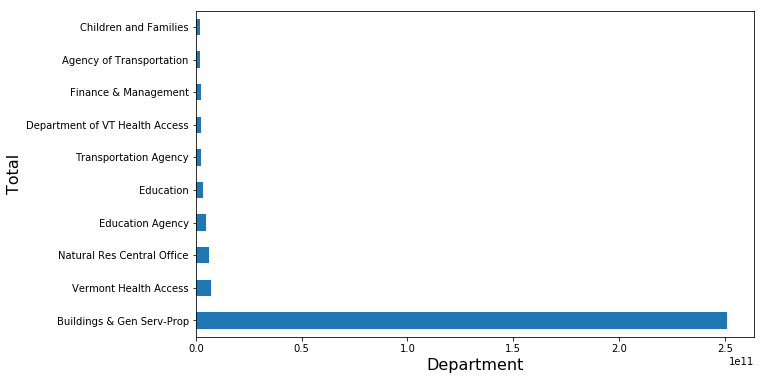

In [26]:
plot_df = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
ORDER BY Total DESC
LIMIT 10
'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Department', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Department', size = 16)
ax.set_ylabel('Total', size = 16)
plt.savefig('barplot.png')
plt.show()

/opt/conda/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


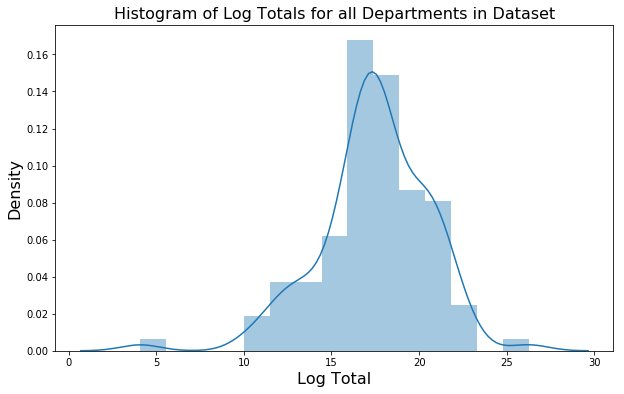

In [17]:
import numpy as np
import seaborn as sns
plot_df2 = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
'''
).toPandas()
plt.figure(figsize = (10,6))
sns.distplot(np.log(plot_df2['Total']))
plt.title('Histogram of Log Totals for all Departments in Dataset', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)
plt.savefig('distplot.png')
plt.show()

In [27]:
# create sparksession
spark = SparkSession \
    .builder \
    .appName("Examine data about passengers on the Titanic") \
    .getOrCreate()

In [28]:
spark

In [1]:
rawData = spark.read\
                   .format('csv')\
                   .option('header','true')\
                   .load('gs://dexdebra-123/datasets/train.csv')
        
                     

In [2]:
rawData

DataFrame[PassengerId: string, Survived: string, Pclass: string, Name: string, Sex: string, Age: string, SibSp: string, Parch: string, Ticket: string, Fare: string, Cabin: string, Embarked: string]

In [3]:
rawData.toPandas().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S


In [4]:
from pyspark.sql.functions import col

dataset=rawData.select(
           col('Survived').cast('float'),
           col('Pclass').cast('float'),
           col('Sex'),
           col('Age').cast('float'),
           col('Fare').cast('float'),
           col('Embarked')
)
    
     
    


In [63]:
dataset

DataFrame[Survived: float, Pclass: float, Sex: string, Age: float, Fare: float, Embarked: string]

In [64]:
dataset.toPandas().head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0.0,3.0,male,22.0,7.250000,S
1,1.0,1.0,female,38.0,71.283302,C
2,1.0,3.0,female,26.0,7.925000,S
3,1.0,1.0,female,35.0,53.099998,S
4,0.0,3.0,male,35.0,8.050000,S


In [65]:
dataset=dataset.replace('?',None).dropna(how='any')

In [66]:
dataset.toPandas().head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0.0,3.0,male,22.0,7.250000,S
1,1.0,1.0,female,38.0,71.283302,C
2,1.0,3.0,female,26.0,7.925000,S
3,1.0,1.0,female,35.0,53.099998,S
4,0.0,3.0,male,35.0,8.050000,S


In [67]:
from pyspark.ml.feature import StringIndexer

dataset = StringIndexer(
      inputCol='Sex',
      outputCol='Gender',
      handleInvalid='keep').fit(dataset).transform(dataset)

dataset=StringIndexer(
      inputCol='Embarked',
      outputCol='Boarded',
      handleInvalid='keep').fit(dataset).transform(dataset)

In [68]:
dataset.toPandas().head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Gender,Boarded
0,0.0,3.0,male,22.0,7.250000,S,0.0,0.0
1,1.0,1.0,female,38.0,71.283302,C,1.0,1.0
2,1.0,3.0,female,26.0,7.925000,S,1.0,0.0
3,1.0,1.0,female,35.0,53.099998,S,1.0,0.0
4,0.0,3.0,male,35.0,8.050000,S,0.0,0.0


In [74]:
dataset=dataset.drop('Sex')
dataset=dataset.drop('Embarked')

In [75]:
dataset.toPandas().head()

,Survived,Pclass,Age,Fare,Gender,Boarded
0,0.0,3.0,22.0,7.250000,0.0,0.0
1,1.0,1.0,38.0,71.283302,1.0,1.0
2,1.0,3.0,26.0,7.925000,1.0,0.0
3,1.0,1.0,35.0,53.099998,1.0,0.0
4,0.0,3.0,35.0,8.050000,0.0,0.0


In [76]:

requiredFeatures = ['Survived',
                    'Pclass',
                    'Age',
                    'Fare',
                    'Gender',
                    'Boarded']

In [77]:
# We will pass the 'requiredFeatures' to VectorAssembler  which will assemble into a single 'features' column
# input Cols to Vectorassembler : list of required features
# output Cols : features

#VectorAssembler is a transformer takes a input dataFrame and creates a new dataFrame with another column 'features' added
# This brings all required features to a single column

from pyspark.ml.feature import VectorAssembler

assembler=VectorAssembler(inputCols=requiredFeatures,outputCol='features')

In [79]:
transformed_data=assembler.transform(dataset)

In [81]:
transformed_data.toPandas().head()


,Survived,Pclass,Age,Fare,Gender,Boarded,features
0,0.0,3.0,22.0,7.250000,0.0,0.0,"[0.0, 3.0, 22.0, 7.25, 0.0, 0.0]"
1,1.0,1.0,38.0,71.283302,1.0,1.0,"[1.0, 1.0, 38.0, 71.2833023071289, 1.0, 1.0]"
2,1.0,3.0,26.0,7.925000,1.0,0.0,"[1.0, 3.0, 26.0, 7.925000190734863, 1.0, 0.0]"
3,1.0,1.0,35.0,53.099998,1.0,0.0,"[1.0, 1.0, 35.0, 53.099998474121094, 1.0, 0.0]"
4,0.0,3.0,35.0,8.050000,0.0,0.0,"[0.0, 3.0, 35.0, 8.050000190734863, 0.0, 0.0]"


In [82]:
from pyspark.ml.clustering import KMeans

# seed determines cluster centres
kmeans=KMeans(k=5,seed=1)


model=kmeans.fit(transformed_data)

clusteredData=model.transform(transformed_data)

In [83]:
clusteredData

DataFrame[Survived: float, Pclass: float, Age: float, Fare: float, Gender: double, Boarded: double, features: vector, prediction: int]

In [84]:
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(clusteredData)
print('silhouette with squared euclidean distance = ' , silhouette)

silhouette with squared euclidean distance =  0.5653938592454313


In [86]:
# Let us print out the centres of the 5 clusters

centers=model.clusterCenters()
print('Cluster Centers: ')

for center in centers:
   print(center)

Cluster Centers: 
[ 0.2832244   2.54466231 32.12527233 13.1086776   0.28104575  0.20697168]
[  0.76470588   1.          31.23529412 231.15367396   0.76470588
   0.47058824]
[ 0.67857143  1.07142857 35.57047619 95.07713104  0.55952381  0.5       ]
[ 0.5704698   2.12751678 18.35402685 34.50953624  0.46308725  0.25503356]
[1.00000000e+00 1.00000000e+00 3.53333333e+01 5.12329224e+02
 3.33333333e-01 1.00000000e+00]


In [87]:
clusteredData.toPandas().head()

,Survived,Pclass,Age,Fare,Gender,Boarded,features,prediction
0,0.0,3.0,22.0,7.250000,0.0,0.0,"[0.0, 3.0, 22.0, 7.25, 0.0, 0.0]",0
1,1.0,1.0,38.0,71.283302,1.0,1.0,"[1.0, 1.0, 38.0, 71.2833023071289, 1.0, 1.0]",2
2,1.0,3.0,26.0,7.925000,1.0,0.0,"[1.0, 3.0, 26.0, 7.925000190734863, 1.0, 0.0]",0
3,1.0,1.0,35.0,53.099998,1.0,0.0,"[1.0, 1.0, 35.0, 53.099998474121094, 1.0, 0.0]",3
4,0.0,3.0,35.0,8.050000,0.0,0.0,"[0.0, 3.0, 35.0, 8.050000190734863, 0.0, 0.0]",0


In [ ]:
# prediction column contains cluster number associated with each record
# Let us examine the dataset as a whole and then examine individual clusters

from pyspark.sql.funtions import *

dataset.select(avg('Survived'), avg('Pclass'),avg('Age'))